#Classificação de Flores

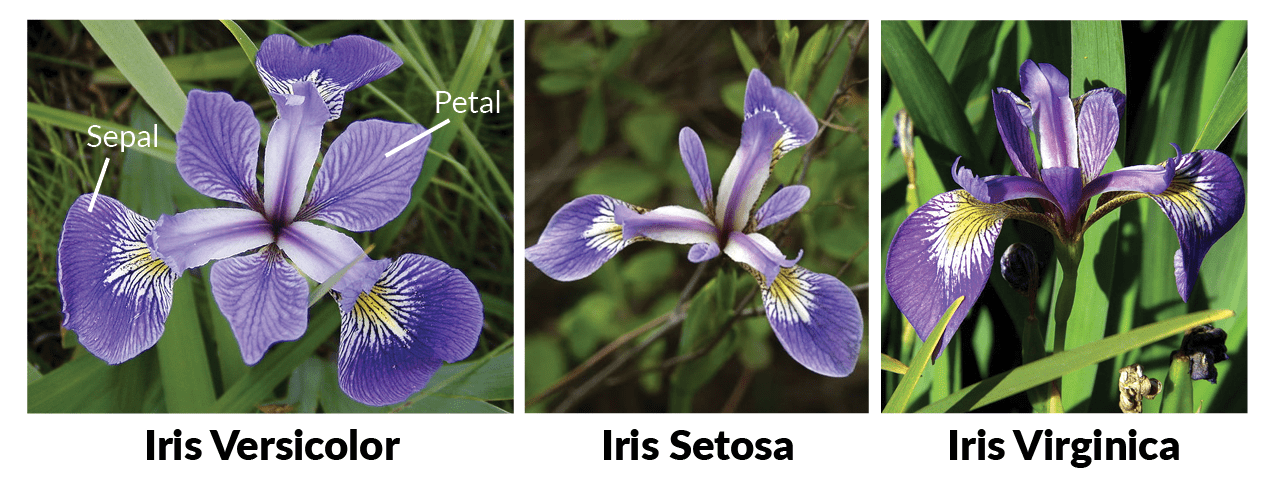

## Carregar base de Dados

In [37]:
# Importação dos pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv('Iris.csv')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##Análise exploratória

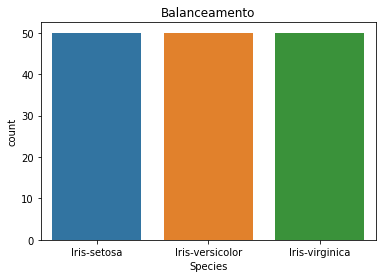

In [40]:
# Balanceamento
sns.countplot(data=data, x='Species')
plt.title('Balanceamento')
plt.show()

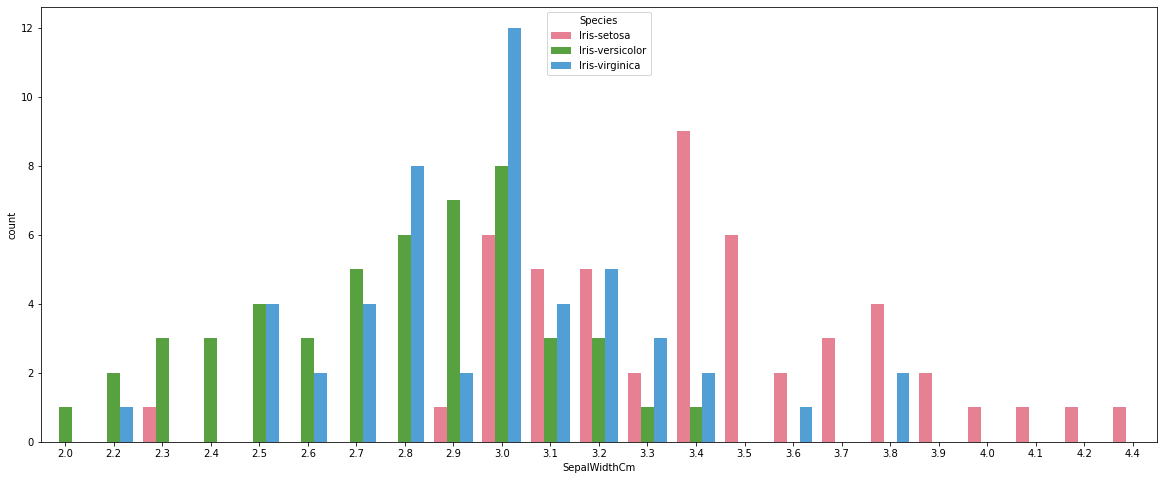

In [41]:
# Atributo odor
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='SepalWidthCm', hue='Species', palette='husl')
plt.show()

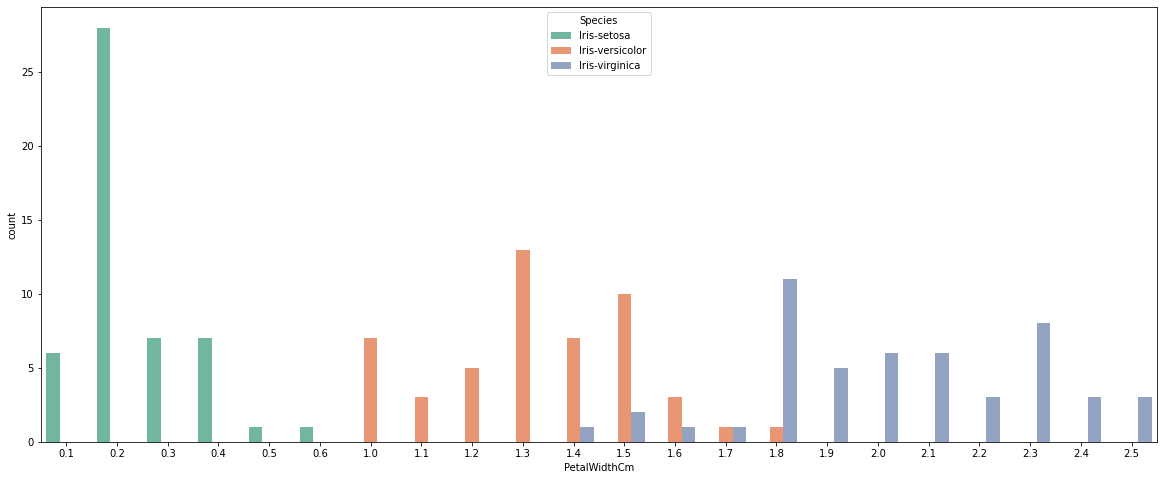

In [42]:
# Atributo veil.color
plt.figure(figsize=(20,8))
sns.countplot(data=data, x='PetalWidthCm', hue='Species', palette='Set2')
plt.show()

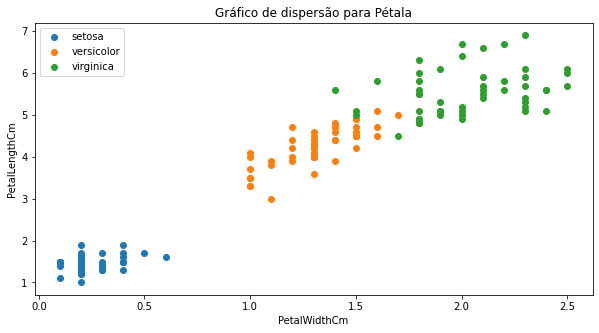

In [43]:
setosa = data[data.Species == 'Iris-setosa']
versicolor = data[data.Species == 'Iris-versicolor']
virginica = data[data.Species == 'Iris-virginica']

plt.figure(figsize=(10,5))
plt.scatter(data=setosa, x='PetalWidthCm', y='PetalLengthCm', label='setosa')
plt.scatter(data=versicolor, x='PetalWidthCm', y='PetalLengthCm', label='versicolor')
plt.scatter(data=virginica, x='PetalWidthCm', y='PetalLengthCm', label='virginica')

plt.xlabel('PetalWidthCm')
plt.ylabel('PetalLengthCm')
plt.title('Gráfico de dispersão para Pétala')

plt.legend()
plt.show()

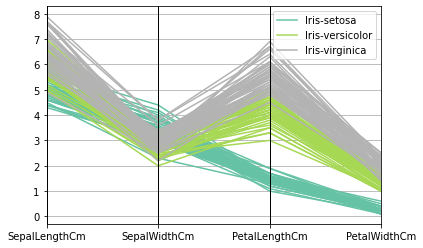

In [44]:
# https://en.wikipedia.org/wiki/Parallel_coordinates
from pandas.plotting import parallel_coordinates
parallel_coordinates(data, 'Species', colormap=plt.get_cmap("Set2"))
plt.show()

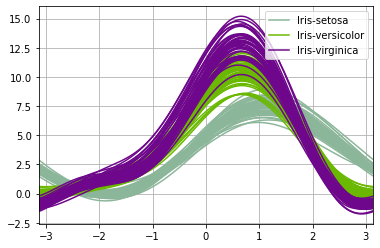

In [45]:
# https://en.wikipedia.org/wiki/Andrews_plot
from pandas.plotting import andrews_curves
plt.figure();
andrews_curves(data, 'Species');

In [46]:
# Transformar label em inteiro
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
species = encoder.fit_transform(data.Species)

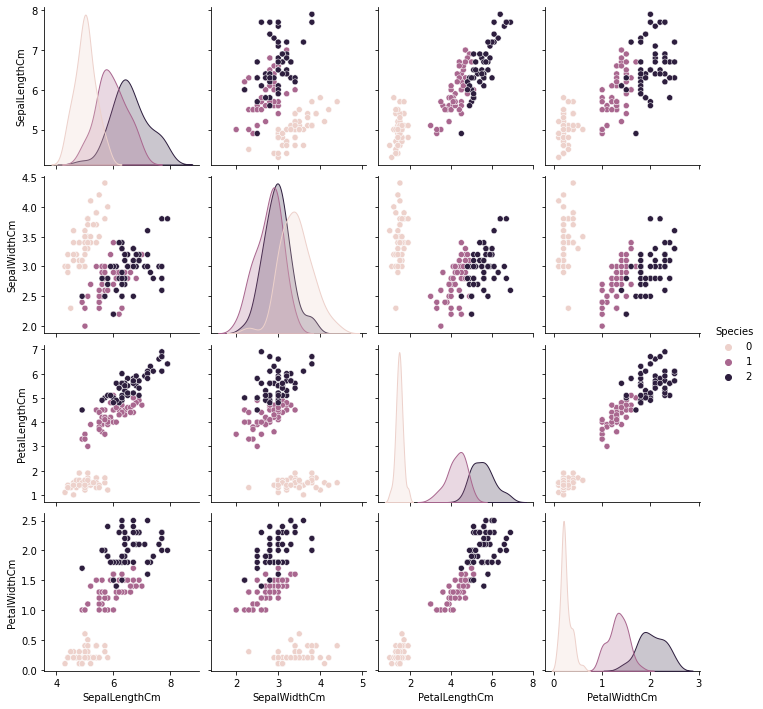

In [47]:
temp_df = data.copy()
temp_df['Species'] = species

sns.pairplot(temp_df, hue='Species')
plt.show()

##Machine Learning

## Separar bases de treino e teste

In [49]:
# semente para reprodução de resultados
seed=10000

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'Species'], data['Species'], test_size=0.2, stratify=data['Species'], random_state=seed)

print('shape input de treino: ', X_train.shape)
print('shape input de teste: ', X_test.shape)
print('shape output de treino: ', y_train.shape)
print('shape output de teste: ', y_test.shape)

shape input de treino:  (120, 4)
shape input de teste:  (30, 4)
shape output de treino:  (120,)
shape output de teste:  (30,)


In [50]:
# Verificar proporções. amostragem estratificada
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [51]:
#treino
print(0.8 * data['Species'].value_counts()[0])
print(0.8 * data['Species'].value_counts()[1])

#test
print(0.2 * data['Species'].value_counts()[0])
print(0.2 * data['Species'].value_counts()[1])

40.0
40.0
10.0
10.0


In [52]:
y_train.value_counts()

Iris-setosa        40
Iris-virginica     40
Iris-versicolor    40
Name: Species, dtype: int64

In [53]:
y_test.value_counts()

Iris-setosa        10
Iris-virginica     10
Iris-versicolor    10
Name: Species, dtype: int64

## Árvore de Decisão

In [54]:
# treinar modelo
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed) # tente mudar parâmetro para evitar overfitting
model.fit(X_train, y_train);

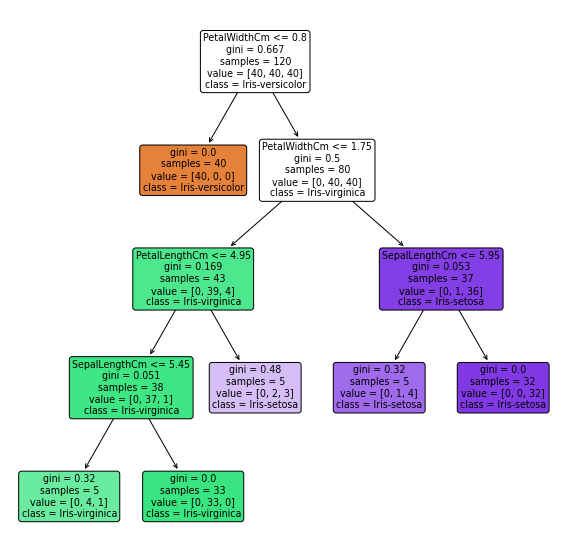

In [56]:
# Visualização gráfica da árvore de decisão
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10)) # Definir tamanho da imagem a ser gerada
tree.plot_tree(model, feature_names=X_train.columns, class_names=y_train.unique(), filled=True, rounded=True); # plota a árvore

In [57]:
# métrica de treino
model.score(X_train, y_train)

0.9666666666666667

In [58]:
# Avaliar modelo treinado na base de teste
model.score(X_test, y_test) # acurácia

1.0

In [59]:
y_pred = model.predict(X_test) #inferência do teste

In [60]:
import numpy as np
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequência:")
print(np.asarray((unique_elements, counts_elements)))

Frequência:
[['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
 [10 10 10]]


In [61]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_pred, y_test)
pd.DataFrame(confMatrix, index=['Previsto Setosa', 'Previsto Versicolor', 'Previsto Virginica'], columns=['Real Setosa', 'Real Versicolor', 'Real Virginica'])

,Real Setosa,Real Versicolor,Real Virginica
Previsto Setosa,10,0,0
Previsto Versicolor,0,10,0
Previsto Virginica,0,0,10


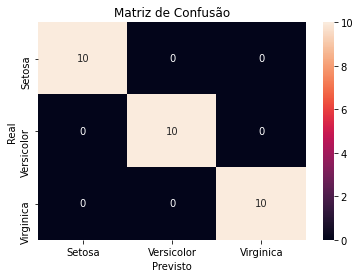

In [62]:
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')

# Colocar os nomes
ax.xaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginica']) 
ax.yaxis.set_ticklabels(['Setosa', 'Versicolor', 'Virginica'])
plt.show()